# Capstone Project - <i>"He Got Game So Show Him The Money"</i>

### Contents:
#### Part 2:
- [Data Import](#Data-Import)
- [EDA](#EDA)
- [Feature Engineering - Per Game Stats](#Feature-Engineering---Per-Game-Stats)
- [Dataset Review](#Dataset-Review)
- [Feature Engineering - Polynomial Features](#Feature-Engineering---Polynomial-Features)
- [Export Merged File](#Export-Merged-File)


## Package Import

In [25]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


## Data Import

In [105]:
statsdf = pd.read_csv('./Data/stats_enriched.csv')

## EDA
### Check Null Values

In [106]:
statsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4309 entries, 0 to 4308
Data columns (total 55 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        4309 non-null   int64  
 1   player      4309 non-null   object 
 2   pos         4309 non-null   object 
 3   age         4309 non-null   int64  
 4   tm          4309 non-null   object 
 5   g           4309 non-null   float64
 6   gs          4309 non-null   float64
 7   mp          4309 non-null   float64
 8   per         4307 non-null   float64
 9   ts%         4298 non-null   float64
 10  3par        4298 non-null   float64
 11  ftr         4298 non-null   float64
 12  orb%        4307 non-null   float64
 13  drb%        4307 non-null   float64
 14  trb%        4307 non-null   float64
 15  ast%        4307 non-null   float64
 16  stl%        4307 non-null   float64
 17  blk%        4307 non-null   float64
 18  tov%        4299 non-null   float64
 19  usg%        4307 non-null  

In [107]:
statsdf.isnull().sum()

year            0
player          0
pos             0
age             0
tm              0
g               0
gs              0
mp              0
per             2
ts%            11
3par           11
ftr            11
orb%            2
drb%            2
trb%            2
ast%            2
stl%            2
blk%            2
tov%           10
usg%            2
ows             0
dws             0
ws              0
ws/48           2
obpm            0
dbpm            0
bpm             0
vorp            0
fg              0
fga             0
fg%            11
3p              0
3pa             0
3p%           584
2p              0
2pa             0
2p%            18
efg%           11
ft              0
fta             0
ft%           124
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
salary          0
year_start      0
height          0
weight          0
college         0
dtype: int

In [108]:
pd.set_option('display.max_columns', None)

In [109]:
statsdf[statsdf['per'].isnull()] #player efficiency rating div/0 due to no minutes played - likely due to rounding

,year,player,pos,age,tm,g,gs,mp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary,year_start,height,weight,college
2658,2010,JamesOn Curry,PG,24,LAC,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,-6.7,-0.2,-6.9,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26917,2010,75,190.0,Oklahoma State University
3043,2013,Damion James,SF,25,BRK,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,-5.5,0.3,-5.2,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50258,2011,79,225.0,University of Texas at Austin


In [110]:
statsdf[statsdf['3par'].isnull()] #3 pt attempt rating div/0 due to no fg attempted

,year,player,pos,age,tm,g,gs,mp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary,year_start,height,weight,college
398,2013,Matt Carroll,SG,32,CHA,1.0,0.0,6.0,2.9,NaN,NaN,NaN,0.0,0.0,0.0,23.4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.029,-7.6,-7.8,-15.4,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3500000,2004,78,212.0,University of Notre Dame
437,2014,Josh Childress,SF,30,NOP,4.0,0.0,24.0,3.9,NaN,NaN,NaN,0.0,14.7,7.3,10.7,2.2,0.0,100.0,1.9,0.0,0.0,0.0,-0.003,-6.2,2.0,-4.3,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,3.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,7405833,2005,80,210.0,Stanford University
1871,2011,Brian Skinner,C,34,MIL,2.0,0.0,6.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.023,-7.2,1.3,-6.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270436,1999,81,255.0,Baylor University
1994,2015,Ronny Turiaf,C,32,MIN,2.0,0.0,19.0,4.3,NaN,NaN,NaN,0.0,6.2,3.0,14.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.009,-5.6,-2.1,-7.7,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1600000,2006,73,249.0,Gonzaga University
2658,2010,JamesOn Curry,PG,24,LAC,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,-6.7,-0.2,-6.9,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26917,2010,75,190.0,Oklahoma State University
3043,2013,Damion James,SF,25,BRK,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,-5.5,0.3,-5.2,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50258,2011,79,225.0,University of Texas at Austin
3062,2011,Gani Lawal,PF,22,PHO,1.0,0.0,2.0,-9.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.009,-5.4,0.5,-4.9,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,473640,2011,81,234.0,Georgia Institute of Technology
3181,2011,Hassan Whiteside,C,21,SAC,1.0,0.0,2.0,-17.9,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.007,-6.5,0.0,-6.5,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,730437,2011,84,265.0,Marshall University
3912,2014,Chris Smith,PG,26,NYK,2.0,0.0,2.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.020,-5.8,-0.5,-6.2,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184538,2014,74,200.0,University of Louisville
4127,2016,Sam Dekker,SF,21,HOU,3.0,0.0,6.0,10.8,NaN,NaN,NaN,0.0,18.5,9.2,0.0,8.2,0.0,NaN,0.0,0.0,0.0,0.0,0.116,-5.3,5.8,0.5,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1646400,2016,81,230.0,University of Wisconsin


In [111]:
statsdf[(statsdf['3par'].isnull()) & (statsdf['fga'] == 0)] #confirmation of above

,year,player,pos,age,tm,g,gs,mp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary,year_start,height,weight,college
398,2013,Matt Carroll,SG,32,CHA,1.0,0.0,6.0,2.9,NaN,NaN,NaN,0.0,0.0,0.0,23.4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.029,-7.6,-7.8,-15.4,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3500000,2004,78,212.0,University of Notre Dame
437,2014,Josh Childress,SF,30,NOP,4.0,0.0,24.0,3.9,NaN,NaN,NaN,0.0,14.7,7.3,10.7,2.2,0.0,100.0,1.9,0.0,0.0,0.0,-0.003,-6.2,2.0,-4.3,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,3.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,7405833,2005,80,210.0,Stanford University
1871,2011,Brian Skinner,C,34,MIL,2.0,0.0,6.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.023,-7.2,1.3,-6.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270436,1999,81,255.0,Baylor University
1994,2015,Ronny Turiaf,C,32,MIN,2.0,0.0,19.0,4.3,NaN,NaN,NaN,0.0,6.2,3.0,14.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.009,-5.6,-2.1,-7.7,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1600000,2006,73,249.0,Gonzaga University
2658,2010,JamesOn Curry,PG,24,LAC,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,-6.7,-0.2,-6.9,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26917,2010,75,190.0,Oklahoma State University
3043,2013,Damion James,SF,25,BRK,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,-5.5,0.3,-5.2,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50258,2011,79,225.0,University of Texas at Austin
3062,2011,Gani Lawal,PF,22,PHO,1.0,0.0,2.0,-9.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.009,-5.4,0.5,-4.9,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,473640,2011,81,234.0,Georgia Institute of Technology
3181,2011,Hassan Whiteside,C,21,SAC,1.0,0.0,2.0,-17.9,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.007,-6.5,0.0,-6.5,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,730437,2011,84,265.0,Marshall University
3912,2014,Chris Smith,PG,26,NYK,2.0,0.0,2.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.020,-5.8,-0.5,-6.2,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184538,2014,74,200.0,University of Louisville
4127,2016,Sam Dekker,SF,21,HOU,3.0,0.0,6.0,10.8,NaN,NaN,NaN,0.0,18.5,9.2,0.0,8.2,0.0,NaN,0.0,0.0,0.0,0.0,0.116,-5.3,5.8,0.5,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1646400,2016,81,230.0,University of Wisconsin


In [112]:
statsdf[statsdf['3p%'].isnull()] #3 pt % div/0 due to no attempts

,year,player,pos,age,tm,g,gs,mp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary,year_start,height,weight,college
0,2008,Shareef Abdur-Rahim,PF,31,SAC,6.0,0.0,51.0,5.5,0.317,0.0,0.286,14.2,9.1,11.6,11.1,1.0,0.0,6.0,14.7,0.0,0.0,0.0,-0.005,-3.6,-2.1,-5.7,0.0,3.0,14.0,0.214,0.0,0.0,NaN,3.0,14.0,0.214,0.214,4.0,4.0,1.000,6.0,4.0,10.0,4.0,1.0,0.0,1.0,9.0,10.0,5800000,1997,81,225.0,University of California
27,2011,Malik Allen,PF,32,ORL,18.0,0.0,178.0,3.3,0.361,0.0,0.065,8.1,12.8,10.5,3.3,0.3,1.7,8.6,9.1,-0.1,0.2,0.2,0.046,-5.3,1.4,-3.9,-0.1,11.0,31.0,0.355,0.0,0.0,NaN,11.0,31.0,0.355,0.355,1.0,2.0,0.500,12.0,20.0,32.0,4.0,1.0,4.0,3.0,30.0,23.0,1229255,2002,73,255.0,Villanova University
61,2008,Joel Anthony,PF,25,MIA,24.0,1.0,498.0,8.8,0.521,0.0,0.817,9.0,13.4,11.2,0.9,1.0,5.0,17.2,9.4,0.1,0.4,0.6,0.054,-4.8,1.4,-3.4,-0.2,28.0,60.0,0.467,0.0,0.0,NaN,28.0,60.0,0.467,0.467,29.0,49.0,0.592,38.0,55.0,93.0,3.0,9.0,31.0,17.0,55.0,85.0,427163,2008,81,245.0,"University of Nevada, Las Vegas"
62,2009,Joel Anthony,C,26,MIA,65.0,28.0,1048.0,9.3,0.521,0.0,0.390,10.1,12.4,11.2,3.7,1.0,7.2,22.9,8.0,0.4,1.4,1.7,0.079,-4.0,4.1,0.2,0.6,57.0,118.0,0.483,0.0,0.0,NaN,57.0,118.0,0.483,0.483,30.0,46.0,0.652,89.0,108.0,197.0,27.0,20.0,93.0,41.0,139.0,144.0,711517,2008,81,245.0,"University of Nevada, Las Vegas"
63,2010,Joel Anthony,C,27,MIA,80.0,16.0,1322.0,10.2,0.546,0.0,0.579,11.0,11.1,11.1,1.3,0.8,6.7,18.4,8.7,1.0,2.0,3.1,0.111,-3.1,3.5,0.4,0.8,76.0,159.0,0.478,0.0,0.0,NaN,76.0,159.0,0.478,0.478,66.0,92.0,0.717,123.0,126.0,249.0,12.0,20.0,109.0,45.0,158.0,218.0,825497,2008,81,245.0,"University of Nevada, Las Vegas"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,2017,Marshall Plumlee,C,24,NYK,21.0,1.0,170.0,10.9,0.521,0.0,0.633,14.5,17.8,16.2,8.1,1.2,1.9,23.8,12.8,0.0,0.1,0.2,0.048,-2.9,0.1,-2.8,0.0,16.0,30.0,0.533,0.0,0.0,NaN,16.0,30.0,0.533,0.533,8.0,19.0,0.421,23.0,28.0,51.0,10.0,4.0,4.0,12.0,23.0,40.0,543471,2017,84,250.0,Duke University
4285,2017,Jakob Poeltl,C,21,TOR,54.0,4.0,626.0,12.2,0.589,0.0,0.496,14.1,15.7,14.9,2.7,1.4,2.8,17.2,12.1,0.9,0.7,1.6,0.125,-1.2,0.5,-0.7,0.2,67.0,115.0,0.583,0.0,0.0,NaN,67.0,115.0,0.583,0.583,31.0,57.0,0.544,78.0,87.0,165.0,12.0,17.0,20.0,29.0,113.0,165.0,2703960,2017,84,248.0,University of Utah
4295,2017,Diamond Stone,C,19,LAC,7.0,0.0,24.0,-1.2,0.339,0.0,0.308,4.8,22.7,14.0,0.0,0.0,3.4,11.9,31.3,-0.1,0.0,-0.1,-0.211,-17.3,-6.9,-24.1,-0.1,3.0,13.0,0.231,0.0,0.0,NaN,3.0,13.0,0.231,0.231,4.0,4.0,1.000,1.0,5.0,6.0,0.0,0.0,1.0,2.0,5.0,10.0,543471,2017,73,255.0,University of Maryland
4297,2017,Mike Tobey,C,22,CHO,2.0,0.0,25.0,-0.1,0.250,0.0,0.000,8.7,4.4,6.6,5.4,0.0,0.0,20.0,9.0,0.0,0.0,0.0,-0.070,-7.4,-1.5,-8.9,0.0,1.0,4.0,0.250,0.0,0.0,NaN,1.0,4.0,0.250,0.250,0.0,0.0,NaN,2.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,2.0,138937,2017,84,260.0,University of Virginia


In [113]:
statsdf[(statsdf['3p%'].isnull()) & (statsdf['3pa'] == 0)] #confirmation of above

,year,player,pos,age,tm,g,gs,mp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary,year_start,height,weight,college
0,2008,Shareef Abdur-Rahim,PF,31,SAC,6.0,0.0,51.0,5.5,0.317,0.0,0.286,14.2,9.1,11.6,11.1,1.0,0.0,6.0,14.7,0.0,0.0,0.0,-0.005,-3.6,-2.1,-5.7,0.0,3.0,14.0,0.214,0.0,0.0,NaN,3.0,14.0,0.214,0.214,4.0,4.0,1.000,6.0,4.0,10.0,4.0,1.0,0.0,1.0,9.0,10.0,5800000,1997,81,225.0,University of California
27,2011,Malik Allen,PF,32,ORL,18.0,0.0,178.0,3.3,0.361,0.0,0.065,8.1,12.8,10.5,3.3,0.3,1.7,8.6,9.1,-0.1,0.2,0.2,0.046,-5.3,1.4,-3.9,-0.1,11.0,31.0,0.355,0.0,0.0,NaN,11.0,31.0,0.355,0.355,1.0,2.0,0.500,12.0,20.0,32.0,4.0,1.0,4.0,3.0,30.0,23.0,1229255,2002,73,255.0,Villanova University
61,2008,Joel Anthony,PF,25,MIA,24.0,1.0,498.0,8.8,0.521,0.0,0.817,9.0,13.4,11.2,0.9,1.0,5.0,17.2,9.4,0.1,0.4,0.6,0.054,-4.8,1.4,-3.4,-0.2,28.0,60.0,0.467,0.0,0.0,NaN,28.0,60.0,0.467,0.467,29.0,49.0,0.592,38.0,55.0,93.0,3.0,9.0,31.0,17.0,55.0,85.0,427163,2008,81,245.0,"University of Nevada, Las Vegas"
62,2009,Joel Anthony,C,26,MIA,65.0,28.0,1048.0,9.3,0.521,0.0,0.390,10.1,12.4,11.2,3.7,1.0,7.2,22.9,8.0,0.4,1.4,1.7,0.079,-4.0,4.1,0.2,0.6,57.0,118.0,0.483,0.0,0.0,NaN,57.0,118.0,0.483,0.483,30.0,46.0,0.652,89.0,108.0,197.0,27.0,20.0,93.0,41.0,139.0,144.0,711517,2008,81,245.0,"University of Nevada, Las Vegas"
63,2010,Joel Anthony,C,27,MIA,80.0,16.0,1322.0,10.2,0.546,0.0,0.579,11.0,11.1,11.1,1.3,0.8,6.7,18.4,8.7,1.0,2.0,3.1,0.111,-3.1,3.5,0.4,0.8,76.0,159.0,0.478,0.0,0.0,NaN,76.0,159.0,0.478,0.478,66.0,92.0,0.717,123.0,126.0,249.0,12.0,20.0,109.0,45.0,158.0,218.0,825497,2008,81,245.0,"University of Nevada, Las Vegas"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,2017,Marshall Plumlee,C,24,NYK,21.0,1.0,170.0,10.9,0.521,0.0,0.633,14.5,17.8,16.2,8.1,1.2,1.9,23.8,12.8,0.0,0.1,0.2,0.048,-2.9,0.1,-2.8,0.0,16.0,30.0,0.533,0.0,0.0,NaN,16.0,30.0,0.533,0.533,8.0,19.0,0.421,23.0,28.0,51.0,10.0,4.0,4.0,12.0,23.0,40.0,543471,2017,84,250.0,Duke University
4285,2017,Jakob Poeltl,C,21,TOR,54.0,4.0,626.0,12.2,0.589,0.0,0.496,14.1,15.7,14.9,2.7,1.4,2.8,17.2,12.1,0.9,0.7,1.6,0.125,-1.2,0.5,-0.7,0.2,67.0,115.0,0.583,0.0,0.0,NaN,67.0,115.0,0.583,0.583,31.0,57.0,0.544,78.0,87.0,165.0,12.0,17.0,20.0,29.0,113.0,165.0,2703960,2017,84,248.0,University of Utah
4295,2017,Diamond Stone,C,19,LAC,7.0,0.0,24.0,-1.2,0.339,0.0,0.308,4.8,22.7,14.0,0.0,0.0,3.4,11.9,31.3,-0.1,0.0,-0.1,-0.211,-17.3,-6.9,-24.1,-0.1,3.0,13.0,0.231,0.0,0.0,NaN,3.0,13.0,0.231,0.231,4.0,4.0,1.000,1.0,5.0,6.0,0.0,0.0,1.0,2.0,5.0,10.0,543471,2017,73,255.0,University of Maryland
4297,2017,Mike Tobey,C,22,CHO,2.0,0.0,25.0,-0.1,0.250,0.0,0.000,8.7,4.4,6.6,5.4,0.0,0.0,20.0,9.0,0.0,0.0,0.0,-0.070,-7.4,-1.5,-8.9,0.0,1.0,4.0,0.250,0.0,0.0,NaN,1.0,4.0,0.250,0.250,0.0,0.0,NaN,2.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,2.0,138937,2017,84,260.0,University of Virginia


In [114]:
statsdf[statsdf['ft%'].isnull()] #free throw % div/0 due to no attempts

,year,player,pos,age,tm,g,gs,mp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary,year_start,height,weight,college
13,2011,Maurice Ager,SG,26,MIN,4.0,0.0,29.0,10.1,0.682,0.364,0.0,0.0,7.9,3.8,6.0,1.7,0.0,26.7,22.0,0.0,0.0,0.0,-0.015,-2.7,-3.6,-6.3,0.0,6.0,11.0,0.545,3.0,4.0,0.75,3.0,7.0,0.429,0.682,0.0,0.0,NaN,0.0,2.0,2.0,1.0,1.0,0.0,4.0,4.0,15.0,83305,2007,77,202.0,Michigan State University
142,2012,Earl Barron,C,30,GSW,2.0,0.0,9.0,4.7,0.500,0.000,0.0,12.6,0.0,6.3,0.0,0.0,0.0,0.0,20.5,0.0,0.0,0.0,0.054,-2.0,-8.3,-10.3,0.0,2.0,4.0,0.500,0.0,0.0,NaN,2.0,4.0,0.500,0.500,0.0,0.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,185588,2006,84,250.0,University of Memphis
398,2013,Matt Carroll,SG,32,CHA,1.0,0.0,6.0,2.9,NaN,NaN,NaN,0.0,0.0,0.0,23.4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.029,-7.6,-7.8,-15.4,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3500000,2004,78,212.0,University of Notre Dame
437,2014,Josh Childress,SF,30,NOP,4.0,0.0,24.0,3.9,NaN,NaN,NaN,0.0,14.7,7.3,10.7,2.2,0.0,100.0,1.9,0.0,0.0,0.0,-0.003,-6.2,2.0,-4.3,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,3.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,7405833,2005,80,210.0,Stanford University
514,2012,Erick Dampier,C,36,ATL,15.0,0.0,83.0,5.5,0.125,0.000,0.0,14.3,21.0,17.7,6.5,0.6,3.7,27.3,6.2,-0.1,0.1,0.1,0.035,-6.3,3.4,-2.8,0.0,1.0,8.0,0.125,0.0,0.0,NaN,1.0,8.0,0.125,0.125,0.0,0.0,NaN,10.0,15.0,25.0,4.0,1.0,4.0,3.0,9.0,2.0,850522,1997,73,265.0,Mississippi State University
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,2017,Ben Bentil,PF,21,DAL,3.0,0.0,10.0,-17.6,0.000,0.333,0.0,0.0,24.4,11.6,0.0,0.0,0.0,25.0,18.9,-0.1,0.0,-0.1,-0.473,-22.4,-4.5,-26.9,-0.1,0.0,3.0,0.000,0.0,1.0,0.00,0.0,2.0,0.000,0.000,0.0,0.0,NaN,0.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,281968,2017,81,235.0,Providence College
4251,2017,Patricio Garino,SG,23,ORL,5.0,0.0,43.0,-9.2,0.000,0.714,0.0,2.5,15.6,8.9,0.0,0.0,0.0,30.0,10.2,-0.2,0.0,-0.2,-0.250,-14.1,-3.3,-17.3,-0.2,0.0,7.0,0.000,0.0,5.0,0.00,0.0,2.0,0.000,0.000,0.0,0.0,NaN,1.0,6.0,7.0,0.0,0.0,0.0,3.0,4.0,0.0,131968,2017,78,210.0,George Washington University
4260,2017,Danuel House,SG,23,WAS,1.0,0.0,1.0,12.2,NaN,NaN,NaN,0.0,100.0,56.4,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.163,-16.4,-4.4,-20.8,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,543471,2017,79,207.0,Texas A&M University
4264,2017,Brice Johnson,PF,22,LAC,3.0,0.0,9.0,17.2,0.286,0.000,0.0,12.8,24.2,18.6,18.6,11.1,9.1,12.5,39.8,-0.1,0.0,0.0,-0.164,-10.7,12.0,1.3,0.0,2.0,7.0,0.286,0.0,0.0,NaN,2.0,7.0,0.286,0.286,0.0,0.0,NaN,1.0,2.0,3.0,1.0,2.0,1.0,1.0,0.0,4.0,1273920,2017,73,230.0,University of North Carolina


In [115]:
statsdf[(statsdf['ft%'].isnull()) & (statsdf['fta'] == 0)] #confirmation of above

,year,player,pos,age,tm,g,gs,mp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary,year_start,height,weight,college
13,2011,Maurice Ager,SG,26,MIN,4.0,0.0,29.0,10.1,0.682,0.364,0.0,0.0,7.9,3.8,6.0,1.7,0.0,26.7,22.0,0.0,0.0,0.0,-0.015,-2.7,-3.6,-6.3,0.0,6.0,11.0,0.545,3.0,4.0,0.75,3.0,7.0,0.429,0.682,0.0,0.0,NaN,0.0,2.0,2.0,1.0,1.0,0.0,4.0,4.0,15.0,83305,2007,77,202.0,Michigan State University
142,2012,Earl Barron,C,30,GSW,2.0,0.0,9.0,4.7,0.500,0.000,0.0,12.6,0.0,6.3,0.0,0.0,0.0,0.0,20.5,0.0,0.0,0.0,0.054,-2.0,-8.3,-10.3,0.0,2.0,4.0,0.500,0.0,0.0,NaN,2.0,4.0,0.500,0.500,0.0,0.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,185588,2006,84,250.0,University of Memphis
398,2013,Matt Carroll,SG,32,CHA,1.0,0.0,6.0,2.9,NaN,NaN,NaN,0.0,0.0,0.0,23.4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.029,-7.6,-7.8,-15.4,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3500000,2004,78,212.0,University of Notre Dame
437,2014,Josh Childress,SF,30,NOP,4.0,0.0,24.0,3.9,NaN,NaN,NaN,0.0,14.7,7.3,10.7,2.2,0.0,100.0,1.9,0.0,0.0,0.0,-0.003,-6.2,2.0,-4.3,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,3.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,7405833,2005,80,210.0,Stanford University
514,2012,Erick Dampier,C,36,ATL,15.0,0.0,83.0,5.5,0.125,0.000,0.0,14.3,21.0,17.7,6.5,0.6,3.7,27.3,6.2,-0.1,0.1,0.1,0.035,-6.3,3.4,-2.8,0.0,1.0,8.0,0.125,0.0,0.0,NaN,1.0,8.0,0.125,0.125,0.0,0.0,NaN,10.0,15.0,25.0,4.0,1.0,4.0,3.0,9.0,2.0,850522,1997,73,265.0,Mississippi State University
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,2017,Ben Bentil,PF,21,DAL,3.0,0.0,10.0,-17.6,0.000,0.333,0.0,0.0,24.4,11.6,0.0,0.0,0.0,25.0,18.9,-0.1,0.0,-0.1,-0.473,-22.4,-4.5,-26.9,-0.1,0.0,3.0,0.000,0.0,1.0,0.00,0.0,2.0,0.000,0.000,0.0,0.0,NaN,0.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,281968,2017,81,235.0,Providence College
4251,2017,Patricio Garino,SG,23,ORL,5.0,0.0,43.0,-9.2,0.000,0.714,0.0,2.5,15.6,8.9,0.0,0.0,0.0,30.0,10.2,-0.2,0.0,-0.2,-0.250,-14.1,-3.3,-17.3,-0.2,0.0,7.0,0.000,0.0,5.0,0.00,0.0,2.0,0.000,0.000,0.0,0.0,NaN,1.0,6.0,7.0,0.0,0.0,0.0,3.0,4.0,0.0,131968,2017,78,210.0,George Washington University
4260,2017,Danuel House,SG,23,WAS,1.0,0.0,1.0,12.2,NaN,NaN,NaN,0.0,100.0,56.4,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.163,-16.4,-4.4,-20.8,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,543471,2017,79,207.0,Texas A&M University
4264,2017,Brice Johnson,PF,22,LAC,3.0,0.0,9.0,17.2,0.286,0.000,0.0,12.8,24.2,18.6,18.6,11.1,9.1,12.5,39.8,-0.1,0.0,0.0,-0.164,-10.7,12.0,1.3,0.0,2.0,7.0,0.286,0.0,0.0,NaN,2.0,7.0,0.286,0.286,0.0,0.0,NaN,1.0,2.0,3.0,1.0,2.0,1.0,1.0,0.0,4.0,1273920,2017,73,230.0,University of North Carolina


In [116]:
statsdf[statsdf['2p%'].isnull()] #2 pt % div/0 due to no attempts

,year,player,pos,age,tm,g,gs,mp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary,year_start,height,weight,college
228,2014,Keith Bogans,SG,33,BOS,6.0,0.0,55.0,9.9,0.820,1.0,0.5,0.0,6.4,3.1,7.7,0.9,0.0,12.0,6.7,0.1,0.0,0.1,0.121,0.1,-2.2,-2.1,0.0,3.0,6.0,0.500,3.0,6.0,0.500,0.0,0.0,NaN,0.750,3.0,3.0,1.0,0.0,3.0,3.0,3.0,1.0,0.0,1.0,2.0,12.0,5058198,2004,77,215.0,University of Kentucky
398,2013,Matt Carroll,SG,32,CHA,1.0,0.0,6.0,2.9,NaN,NaN,NaN,0.0,0.0,0.0,23.4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.029,-7.6,-7.8,-15.4,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3500000,2004,78,212.0,University of Notre Dame
437,2014,Josh Childress,SF,30,NOP,4.0,0.0,24.0,3.9,NaN,NaN,NaN,0.0,14.7,7.3,10.7,2.2,0.0,100.0,1.9,0.0,0.0,0.0,-0.003,-6.2,2.0,-4.3,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,3.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,7405833,2005,80,210.0,Stanford University
1783,2016,Nate Robinson,PG,31,NOP,2.0,1.0,23.0,2.6,0.000,1.0,0.0,0.0,0.0,0.0,21.8,2.2,0.0,0.0,1.9,0.0,0.0,0.0,0.038,-6.1,-4.7,-10.8,-0.1,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,NaN,0.000,0.0,0.0,NaN,0.0,0.0,0.0,4.0,1.0,0.0,0.0,5.0,0.0,26456,2006,69,180.0,University of Washington
1862,2011,Bobby Simmons,SF,30,SAS,2.0,0.0,16.0,-5.5,0.000,1.0,0.0,0.0,0.0,0.0,15.7,0.0,0.0,0.0,8.6,0.0,0.0,0.0,-0.138,-8.6,-5.6,-14.3,0.0,0.0,3.0,0.000,0.0,3.0,0.000,0.0,0.0,NaN,0.000,0.0,0.0,NaN,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,71951,2002,79,210.0,DePaul University
1871,2011,Brian Skinner,C,34,MIL,2.0,0.0,6.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.023,-7.2,1.3,-6.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270436,1999,81,255.0,Baylor University
1994,2015,Ronny Turiaf,C,32,MIN,2.0,0.0,19.0,4.3,NaN,NaN,NaN,0.0,6.2,3.0,14.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.009,-5.6,-2.1,-7.7,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1600000,2006,73,249.0,Gonzaga University
2095,2009,Martell Webster,SF,22,POR,1.0,0.0,5.0,-8.4,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4,0.0,0.0,0.0,-0.204,-8.8,-2.9,-11.7,0.0,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,NaN,0.000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3771133,2006,79,230.0,No College
2658,2010,JamesOn Curry,PG,24,LAC,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,-6.7,-0.2,-6.9,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26917,2010,75,190.0,Oklahoma State University
3043,2013,Damion James,SF,25,BRK,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,-5.5,0.3,-5.2,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50258,2011,79,225.0,University of Texas at Austin


In [117]:
statsdf[(statsdf['2p%'].isnull()) & (statsdf['2pa'] == 0)] #confirmation of above

,year,player,pos,age,tm,g,gs,mp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary,year_start,height,weight,college
228,2014,Keith Bogans,SG,33,BOS,6.0,0.0,55.0,9.9,0.820,1.0,0.5,0.0,6.4,3.1,7.7,0.9,0.0,12.0,6.7,0.1,0.0,0.1,0.121,0.1,-2.2,-2.1,0.0,3.0,6.0,0.500,3.0,6.0,0.500,0.0,0.0,NaN,0.750,3.0,3.0,1.0,0.0,3.0,3.0,3.0,1.0,0.0,1.0,2.0,12.0,5058198,2004,77,215.0,University of Kentucky
398,2013,Matt Carroll,SG,32,CHA,1.0,0.0,6.0,2.9,NaN,NaN,NaN,0.0,0.0,0.0,23.4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.029,-7.6,-7.8,-15.4,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3500000,2004,78,212.0,University of Notre Dame
437,2014,Josh Childress,SF,30,NOP,4.0,0.0,24.0,3.9,NaN,NaN,NaN,0.0,14.7,7.3,10.7,2.2,0.0,100.0,1.9,0.0,0.0,0.0,-0.003,-6.2,2.0,-4.3,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,3.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,7405833,2005,80,210.0,Stanford University
1783,2016,Nate Robinson,PG,31,NOP,2.0,1.0,23.0,2.6,0.000,1.0,0.0,0.0,0.0,0.0,21.8,2.2,0.0,0.0,1.9,0.0,0.0,0.0,0.038,-6.1,-4.7,-10.8,-0.1,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,NaN,0.000,0.0,0.0,NaN,0.0,0.0,0.0,4.0,1.0,0.0,0.0,5.0,0.0,26456,2006,69,180.0,University of Washington
1862,2011,Bobby Simmons,SF,30,SAS,2.0,0.0,16.0,-5.5,0.000,1.0,0.0,0.0,0.0,0.0,15.7,0.0,0.0,0.0,8.6,0.0,0.0,0.0,-0.138,-8.6,-5.6,-14.3,0.0,0.0,3.0,0.000,0.0,3.0,0.000,0.0,0.0,NaN,0.000,0.0,0.0,NaN,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,71951,2002,79,210.0,DePaul University
1871,2011,Brian Skinner,C,34,MIL,2.0,0.0,6.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.023,-7.2,1.3,-6.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270436,1999,81,255.0,Baylor University
1994,2015,Ronny Turiaf,C,32,MIN,2.0,0.0,19.0,4.3,NaN,NaN,NaN,0.0,6.2,3.0,14.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.009,-5.6,-2.1,-7.7,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1600000,2006,73,249.0,Gonzaga University
2095,2009,Martell Webster,SF,22,POR,1.0,0.0,5.0,-8.4,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4,0.0,0.0,0.0,-0.204,-8.8,-2.9,-11.7,0.0,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,NaN,0.000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3771133,2006,79,230.0,No College
2658,2010,JamesOn Curry,PG,24,LAC,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,-6.7,-0.2,-6.9,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26917,2010,75,190.0,Oklahoma State University
3043,2013,Damion James,SF,25,BRK,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,-5.5,0.3,-5.2,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50258,2011,79,225.0,University of Texas at Austin


### Feature Engineering - Per Game Stats

In [118]:
#Add per game stats
statsdf['rpg'] = round((statsdf['trb'] / statsdf['g']), 1) #rebounds per game
statsdf['apg'] = round((statsdf['ast'] / statsdf['g']), 1) #assists per game
statsdf['ppg'] = round((statsdf['pts'] / statsdf['g']), 1) #points per game
statsdf['spg'] = round((statsdf['stl'] / statsdf['g']), 1) #steals per game
statsdf['bpg'] = round((statsdf['blk'] / statsdf['g']), 1) #blocks per game

In [119]:
#All NaN are a result of div/0
statsdf.fillna(0, inplace = True)

In [123]:
statsdf['yrs_in_league'] = (statsdf['year']) - (statsdf['year_start'])

### Dataset Review

In [124]:
statsdf

,year,player,pos,age,tm,g,gs,mp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary,year_start,height,weight,college,rpg,apg,ppg,spg,bpg,yrs_in_league
0,2008,Shareef Abdur-Rahim,PF,31,SAC,6.0,0.0,51.0,5.5,0.317,0.000,0.286,14.2,9.1,11.6,11.1,1.0,0.0,6.0,14.7,0.0,0.0,0.0,-0.005,-3.6,-2.1,-5.7,0.0,3.0,14.0,0.214,0.0,0.0,0.000,3.0,14.0,0.214,0.214,4.0,4.0,1.000,6.0,4.0,10.0,4.0,1.0,0.0,1.0,9.0,10.0,5800000,1997,81,225.0,University of California,1.7,0.7,1.7,0.2,0.0,11
1,2008,Arron Afflalo,SG,22,DET,75.0,9.0,970.0,10.2,0.494,0.199,0.361,4.4,12.5,8.4,8.1,1.8,0.7,10.9,15.2,0.5,1.4,1.9,0.092,-2.3,0.6,-1.6,0.1,99.0,241.0,0.411,10.0,48.0,0.208,89.0,193.0,0.461,0.432,68.0,87.0,0.782,36.0,101.0,137.0,52.0,31.0,8.0,34.0,83.0,276.0,944520,2008,77,210.0,"University of California, Los Angeles",1.8,0.7,3.7,0.4,0.1,0
2,2009,Arron Afflalo,SG,23,DET,74.0,8.0,1234.0,8.9,0.548,0.357,0.237,2.8,10.1,6.4,5.5,1.3,0.8,11.5,14.5,0.8,1.0,1.8,0.069,-1.7,-0.7,-2.4,-0.1,131.0,300.0,0.437,43.0,107.0,0.402,88.0,193.0,0.456,0.508,58.0,71.0,0.817,30.0,104.0,134.0,44.0,28.0,13.0,43.0,144.0,363.0,1015440,2008,77,210.0,"University of California, Los Angeles",1.8,0.6,4.9,0.4,0.2,1
3,2010,Arron Afflalo,SG,24,DEN,82.0,75.0,2221.0,10.9,0.576,0.426,0.168,3.1,9.9,6.5,9.3,1.0,1.0,10.5,14.0,2.8,1.4,4.3,0.092,0.8,-0.5,0.3,1.3,272.0,585.0,0.465,108.0,249.0,0.434,164.0,336.0,0.488,0.557,72.0,98.0,0.735,59.0,193.0,252.0,138.0,46.0,30.0,74.0,225.0,724.0,1086240,2008,77,210.0,"University of California, Los Angeles",3.1,1.7,8.8,0.6,0.4,2
4,2011,Arron Afflalo,SG,25,DEN,69.0,69.0,2324.0,13.6,0.620,0.396,0.260,2.3,9.9,6.2,10.9,0.7,1.0,9.2,14.8,4.8,1.4,6.2,0.128,2.4,-0.2,2.1,2.4,312.0,627.0,0.498,105.0,248.0,0.423,207.0,379.0,0.546,0.581,138.0,163.0,0.847,45.0,206.0,251.0,168.0,34.0,31.0,71.0,153.0,867.0,1959577,2008,77,210.0,"University of California, Los Angeles",3.6,2.4,12.6,0.5,0.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4304,2017,Troy Williams,SF,22,TOT,30.0,16.0,557.0,8.9,0.511,0.371,0.192,3.0,11.2,7.0,7.0,2.5,1.7,15.4,17.2,-0.4,0.7,0.3,0.030,-3.4,0.7,-2.7,-0.1,73.0,167.0,0.437,18.0,62.0,0.290,55.0,105.0,0.524,0.491,21.0,32.0,0.656,15.0,54.0,69.0,25.0,27.0,10.0,33.0,60.0,185.0,652165,2017,79,218.0,Indiana University,2.3,0.8,6.2,0.9,0.3,0
4305,2017,Kyle Wiltjer,PF,24,HOU,14.0,0.0,44.0,6.7,0.437,0.929,0.143,9.9,14.9,12.4,6.1,3.3,1.8,25.2,19.1,-0.1,0.1,0.0,-0.039,-4.0,0.0,-4.0,0.0,4.0,14.0,0.286,4.0,13.0,0.308,0.0,1.0,0.000,0.429,1.0,2.0,0.500,4.0,6.0,10.0,2.0,3.0,1.0,5.0,4.0,13.0,543471,2017,73,240.0,Gonzaga University,0.7,0.1,0.9,0.2,0.1,0
4306,2017,Stephen Zimmerman,C,20,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,-0.1,0.1,0.0,-0.005,-7.8,0.4,-7.3,-0.1,10.0,31.0,0.323,0.0,0.0,0.000,10.0,31.0,0.323,0.323,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0,950000,2017,84,240.0,"University of Nevada, Las Vegas",1.8,0.2,1.2,0.1,0.3,0
4307,2017,Paul Zipser,SF,22,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,750000,2017,80,215.0,No College,2.8,0.8,5.5,0.3,0.4,0


In [125]:
statsdf.shape

(4309, 61)

In [126]:
statsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4309 entries, 0 to 4308
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           4309 non-null   int64  
 1   player         4309 non-null   object 
 2   pos            4309 non-null   object 
 3   age            4309 non-null   int64  
 4   tm             4309 non-null   object 
 5   g              4309 non-null   float64
 6   gs             4309 non-null   float64
 7   mp             4309 non-null   float64
 8   per            4309 non-null   float64
 9   ts%            4309 non-null   float64
 10  3par           4309 non-null   float64
 11  ftr            4309 non-null   float64
 12  orb%           4309 non-null   float64
 13  drb%           4309 non-null   float64
 14  trb%           4309 non-null   float64
 15  ast%           4309 non-null   float64
 16  stl%           4309 non-null   float64
 17  blk%           4309 non-null   float64
 18  tov%    

In [127]:
statsdf.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4309.0,2.012589e+03,2.871154e+00,2008.000,2010.000,2013.000,2015.000,2.017000e+03
age,4309.0,2.658389e+01,4.264005e+00,19.000,23.000,26.000,30.000,4.000000e+01
g,4309.0,5.401764e+01,2.398882e+01,1.000,36.000,61.000,75.000,8.300000e+01
gs,4309.0,2.639197e+01,2.909574e+01,0.000,1.000,12.000,54.000,8.200000e+01
mp,4309.0,1.264487e+03,8.739755e+02,0.000,466.000,1207.000,2007.000,3.343000e+03
per,4309.0,1.294031e+01,5.970335e+00,-30.200,9.900,12.900,16.100,1.291000e+02
ts%,4309.0,5.153878e-01,8.913176e-02,0.000,0.487,0.527,0.561,1.064000e+00
3par,4309.0,2.415744e-01,2.123360e-01,0.000,0.013,0.236,0.400,1.000000e+00
ftr,4309.0,2.902444e-01,2.149166e-01,0.000,0.176,0.256,0.357,6.000000e+00
orb%,4309.0,5.597053e+00,4.990435e+00,0.000,2.100,4.100,8.500,1.000000e+02


#### Baseline (pre-outlier removal)

In [128]:
statsdf['salary'].mean()

4655736.012299838

In [129]:
statsdf['salary'].std()

4999271.923593032

In [130]:
baseline = [statsdf['salary'].mean() for i in range(len(statsdf))]
r2_score(statsdf['salary'], baseline)

0.0

In [131]:
type(baseline[0])

float

#### Outlier Identification

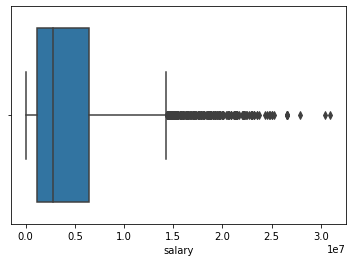

In [132]:
sns.boxplot(statsdf['salary']);

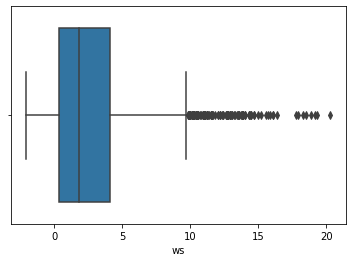

In [133]:
sns.boxplot(statsdf['ws']);

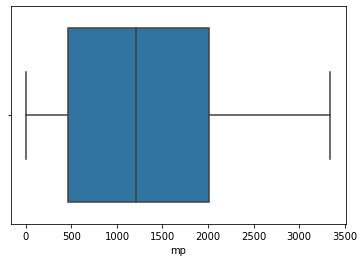

In [134]:
sns.boxplot(statsdf['mp']);

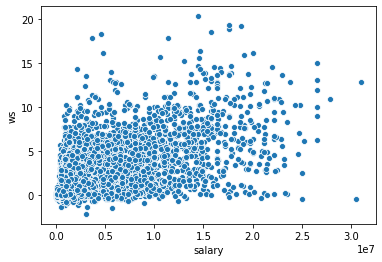

In [135]:
x = statsdf['salary']
y = statsdf['ws']
sns.scatterplot(x,y)

In [136]:
statsdf[(statsdf['salary'] < 5000000) & (statsdf['ws'] > 10)] #identify outliers to remove: productive players with low salary


,year,player,pos,age,tm,g,gs,mp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary,year_start,height,weight,college,rpg,apg,ppg,spg,bpg,yrs_in_league
368,2008,Jose Calderon,PG,26,TOR,82.0,56.0,2484.0,20.5,0.607,0.260,0.170,1.6,9.7,5.6,42.3,1.9,0.2,14.2,16.8,8.1,2.2,10.2,0.197,4.0,-1.5,2.6,2.9,367.0,707.0,0.519,79.0,184.0,0.429,288.0,523.0,0.551,0.575,109.0,120.0,0.908,34.0,202.0,236.0,678.0,87.0,6.0,126.0,134.0,922.0,2471604,2006,75,200.0,No College,2.9,8.3,11.2,1.1,0.1,2
638,2010,Kevin Durant,SF,21,OKC,82.0,82.0,3239.0,26.2,0.607,0.210,0.504,3.8,17.9,11.0,13.5,1.8,1.9,11.7,32.0,11.1,5.0,16.1,0.238,4.9,0.2,5.1,5.8,794.0,1668.0,0.476,128.0,351.0,0.365,666.0,1317.0,0.506,0.514,756.0,840.0,0.900,105.0,518.0,623.0,231.0,112.0,84.0,271.0,171.0,2472.0,4796880,2008,81,240.0,University of Texas at Austin,7.6,2.8,30.1,1.4,1.0,2
997,2010,Al Horford,C,23,ATL,81.0,81.0,2845.0,19.4,0.594,0.001,0.319,9.6,23.3,16.4,10.4,1.1,2.4,11.2,17.6,6.9,3.9,10.9,0.183,1.5,1.9,3.3,3.8,467.0,847.0,0.551,1.0,1.0,1.000,466.0,846.0,0.551,0.552,213.0,270.0,0.789,236.0,563.0,799.0,189.0,59.0,91.0,122.0,225.0,1148.0,4307640,2008,73,245.0,University of Florida,9.9,2.3,14.2,0.7,1.1,2
1624,2008,Chris Paul,PG,22,NOH,80.0,80.0,3006.0,28.3,0.576,0.193,0.302,2.4,10.3,6.2,52.2,3.9,0.1,12.1,25.7,13.2,4.6,17.8,0.284,8.3,0.9,9.2,8.5,630.0,1291.0,0.488,92.0,249.0,0.369,538.0,1042.0,0.516,0.524,332.0,390.0,0.851,62.0,259.0,321.0,925.0,217.0,4.0,201.0,185.0,1684.0,3615960,2006,72,175.0,Wake Forest University,4.0,11.6,21.0,2.7,0.0,2
1625,2009,Chris Paul,PG,23,NOH,78.0,78.0,3002.0,30.0,0.599,0.140,0.418,2.8,14.6,8.7,54.5,3.9,0.3,13.5,27.5,13.3,5.0,18.3,0.292,9.1,2.1,11.2,10.0,631.0,1255.0,0.503,64.0,176.0,0.364,567.0,1079.0,0.525,0.528,455.0,524.0,0.868,69.0,363.0,432.0,861.0,216.0,10.0,231.0,212.0,1781.0,4574189,2006,72,175.0,Wake Forest University,5.5,11.0,22.8,2.8,0.1,3
1805,2009,Brandon Roy,SG,24,POR,78.0,78.0,2903.0,24.0,0.573,0.167,0.383,4.4,11.6,7.9,25.4,1.7,0.6,9.0,27.4,10.9,2.6,13.5,0.223,5.9,-0.2,5.8,5.7,633.0,1318.0,0.480,83.0,220.0,0.377,550.0,1098.0,0.501,0.512,416.0,505.0,0.824,104.0,266.0,370.0,400.0,88.0,22.0,152.0,127.0,1765.0,3084240,2007,78,215.0,University of Washington,4.7,5.1,22.6,1.1,0.3,2
2136,2008,Deron Williams,PG,23,UTA,82.0,82.0,3059.0,20.8,0.595,0.188,0.368,1.4,8.3,4.9,43.6,1.5,0.6,17.7,23.1,8.9,2.3,11.3,0.177,4.3,-2.2,2.1,3.2,566.0,1117.0,0.507,83.0,210.0,0.395,483.0,907.0,0.533,0.544,330.0,411.0,0.803,34.0,209.0,243.0,862.0,90.0,23.0,279.0,200.0,1545.0,4010640,2006,75,200.0,University of Illinois at Urbana-Champaign,3.0,10.5,18.8,1.1,0.3,2
2461,2011,Kevin Love,PF,22,MIN,73.0,73.0,2611.0,24.3,0.593,0.206,0.486,13.7,34.2,23.6,11.8,0.9,0.8,11.1,22.9,8.9,2.5,11.4,0.210,3.9,-0.2,3.7,3.8,482.0,1026.0,0.470,88.0,211.0,0.417,394.0,815.0,0.483,0.513,424.0,499.0,0.850,330.0,782.0,1112.0,184.0,45.0,28.0,155.0,148.0,1476.0,3638280,2009,73,251.0,"University of California, Los Angeles",15.2,2.5,20.2,0.6,0.4,2
2662,2013,Stephen Curry,PG,24,GSW,78.0,78.0,2983.0,21.3,0.589,0.432,0.210,2.3,9.1,5.8,31.1,2.1,0.3,13.7,26.4,8.4,2.8,11.2,0.180,6.3,-0.9,5.4,5.6,626.0,1388.0,0.451,272.0,600.0,0.453,354.0,788.0,0.449,0.549,262.0,291.0,0.900,59.0,255.0,314.0,539.0,126.0,12.0,240.0,198.0,1786.0,3958742,2010,75,190.0,Davidson College,4.0,6.9,22.9,1.6,0.2,3
3009,2014,Paul George,SF,23,IND,80.0,80.0,2898.0,20.1,0.555,0.367,0.341,2.6,17.7,10.5,17.9,2.7,0.6,12.5,28.3,4.4,6.4,10.8,0.178,2.9,1.8,4.7,4.9,577.0,1362.0,0.424,182.0,500.0,0.364,395.0,862.0,0.458,0.490,401.0,464.0,0.864,64.0,478.0,542.0,283.0,151.0,22.0,224.0,198.0,1737.0,3282003,2011,81,220.0,"California State University, Fresno",6.8,3.5,21.7,1.9,0.3,3


In [137]:
dropindex = statsdf[(statsdf['salary'] < 5000000) & (statsdf['ws'] > 10)].index

In [138]:
statsdf.drop(dropindex, axis = 0, inplace = True)

In [139]:
#identify outliers to remove: unproductive players with high salary
statsdf[(statsdf['salary'] > 20000000) & (statsdf['ws'] < 3)]

,year,player,pos,age,tm,g,gs,mp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary,year_start,height,weight,college,rpg,apg,ppg,spg,bpg,yrs_in_league
58,2015,Carmelo Anthony,SF,30,NYK,40.0,40.0,1428.0,21.5,0.531,0.222,0.294,5.7,16.0,10.7,18.0,1.5,1.0,8.9,32.2,2.2,0.6,2.9,0.097,3.5,-2.2,1.4,1.2,358.0,806.0,0.444,61.0,179.0,0.341,297.0,627.0,0.474,0.482,189.0,237.0,0.797,72.0,192.0,264.0,122.0,40.0,17.0,89.0,87.0,966.0,22458401,2004,80,240.0,Syracuse University,6.6,3.0,24.2,1.0,0.4,11
340,2014,Kobe Bryant,SG,35,LAL,6.0,6.0,177.0,10.7,0.505,0.219,0.288,1.2,14.5,7.8,34.6,1.9,0.4,29.2,28.7,-0.5,0.1,-0.4,-0.097,-4.7,-1.3,-5.9,-0.2,31.0,73.0,0.425,3.0,16.0,0.188,28.0,57.0,0.491,0.445,18.0,21.0,0.857,2.0,24.0,26.0,38.0,7.0,1.0,34.0,9.0,83.0,30453000,1997,78,212.0,No College,4.3,6.3,13.8,1.2,0.2,17
341,2015,Kobe Bryant,SG,36,LAL,35.0,35.0,1207.0,17.6,0.477,0.258,0.338,2.3,16.5,9.1,29.9,2.0,0.5,13.5,34.9,-0.4,0.6,0.2,0.006,1.6,-1.3,0.3,0.7,266.0,713.0,0.373,54.0,184.0,0.293,212.0,529.0,0.401,0.411,196.0,241.0,0.813,26.0,173.0,199.0,197.0,47.0,7.0,128.0,65.0,782.0,23500000,1997,78,212.0,No College,5.7,5.6,22.3,1.3,0.2,18
342,2016,Kobe Bryant,SF,37,LAL,66.0,66.0,1863.0,14.9,0.469,0.420,0.252,2.3,12.3,7.1,19.1,1.7,0.5,9.4,32.2,-0.9,0.5,-0.4,-0.010,0.8,-3.3,-2.5,-0.2,398.0,1113.0,0.358,133.0,467.0,0.285,265.0,646.0,0.410,0.417,232.0,281.0,0.826,41.0,206.0,247.0,184.0,62.0,13.0,129.0,115.0,1161.0,25000000,1997,78,212.0,No College,3.7,2.8,17.6,0.9,0.2,19
408,2012,Vince Carter,SG,35,DAL,61.0,40.0,1542.0,13.6,0.519,0.378,0.212,2.3,12.5,7.5,15.0,1.9,1.3,12.4,20.4,1.0,1.8,2.9,0.090,0.0,0.6,0.6,1.0,223.0,542.0,0.411,74.0,205.0,0.361,149.0,337.0,0.442,0.480,95.0,115.0,0.826,32.0,173.0,205.0,139.0,56.0,25.0,84.0,134.0,615.0,21300000,1999,78,220.0,University of North Carolina,3.4,2.3,10.1,0.9,0.4,13
1179,2016,Joe Johnson,SF,34,TOT,81.0,81.0,2703.0,12.0,0.538,0.364,0.165,2.0,10.2,6.1,18.0,1.1,0.1,14.7,17.9,1.9,0.8,2.7,0.048,0.3,-1.6,-1.3,0.4,377.0,859.0,0.439,120.0,313.0,0.383,257.0,546.0,0.471,0.509,118.0,142.0,0.831,49.0,243.0,292.0,318.0,61.0,4.0,159.0,146.0,992.0,22309344,2002,79,240.0,University of Arkansas,3.6,3.9,12.2,0.8,0.0,14
1298,2012,Rashard Lewis,SF,32,WAS,28.0,15.0,729.0,9.3,0.457,0.303,0.167,5.2,11.7,8.4,5.7,1.6,1.1,11.9,16.5,-0.2,0.4,0.3,0.018,-2.2,-0.8,-3.0,-0.2,85.0,221.0,0.385,16.0,67.0,0.239,69.0,154.0,0.448,0.421,31.0,37.0,0.838,34.0,75.0,109.0,27.0,23.0,10.0,32.0,49.0,217.0,21136631,1999,73,215.0,No College,3.9,1.0,7.8,0.8,0.4,13
1336,2009,Stephon Marbury,PG,31,BOS,23.0,4.0,414.0,4.4,0.377,0.225,0.117,0.6,7.3,4.1,26.6,1.3,0.6,24.1,17.3,-0.9,0.5,-0.3,-0.038,-6.2,-1.1,-7.3,-0.6,38.0,111.0,0.342,6.0,25.0,0.240,32.0,86.0,0.372,0.369,6.0,13.0,0.462,2.0,26.0,28.0,75.0,10.0,3.0,37.0,34.0,88.0,20840625,1997,74,180.0,Georgia Institute of Technology,1.2,3.3,3.8,0.4,0.1,12
1395,2009,Tracy McGrady,SG,29,HOU,35.0,35.0,1181.0,16.3,0.492,0.241,0.322,2.1,12.7,7.6,25.2,1.9,0.9,11.1,24.5,0.9,1.8,2.7,0.108,0.4,1.0,1.4,1.0,188.0,485.0,0.388,44.0,117.0,0.376,144.0,368.0,0.391,0.433,125.0,156.0,0.801,20.0,134.0,154.0,175.0,42.0,15.0,69.0,38.0,545.0,20370437,1998,80,210.0,No College,4.4,5.0,15.6,1.2,0.4,11
1396,2010,Tracy McGrady,SG,30,TOT,30.0,24.0,673.0,12.2,0.466,0.272,0.268,3.7,12.4,7.9,22.6,1.1,1.5,14.3,20.6,0.0,0.3,0.3,0.018,-2.2,-1.2,-3.3,-0.2,91.0,235.0,0.387,16.0,64.0,0.250,75.0,171.0,0.439,0.421,47.0,63.0,0.746,22.0,72.0,94.0,99.0,15.0,14.0,44.0,40.0,245.0,23239562,1998,80,210.0,No College,3.1,3.3,8.2,0.5,0.5,12


In [140]:
dropindex = statsdf[(statsdf['salary'] > 20000000) & (statsdf['ws'] < 3)].index

In [141]:
statsdf.drop(dropindex, axis = 0, inplace = True)

In [142]:
dropindex = statsdf[(statsdf['ws'] < 0)].index

In [143]:
statsdf.drop(dropindex, axis = 0, inplace = True)

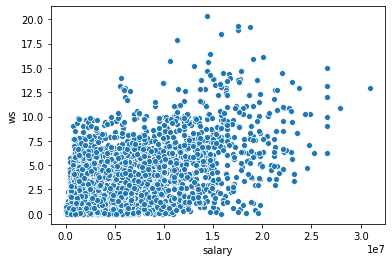

In [144]:
x = statsdf['salary']
y = statsdf['ws']
sns.scatterplot(x,y)

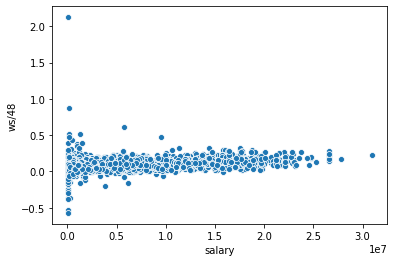

In [145]:
x = statsdf['salary']
y = statsdf['ws/48']
sns.scatterplot(x,y)

In [146]:
dropindex = statsdf[(statsdf['ws/48'] < 0)].index
statsdf.drop(dropindex, axis = 0, inplace = True)

In [147]:
dropindex = statsdf[(statsdf['ws/48'] > 0.6)].index
statsdf.drop(dropindex, axis = 0, inplace = True)

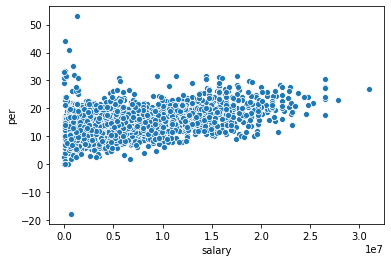

In [148]:
x = statsdf['salary']
y = statsdf['per']
sns.scatterplot(x,y)

In [149]:
statsdf[(statsdf['salary'] < 2500000) & (statsdf['per'] > 40)]

,year,player,pos,age,tm,g,gs,mp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary,year_start,height,weight,college,rpg,apg,ppg,spg,bpg,yrs_in_league
2152,2009,Marcus Williams,PF,22,SAS,2.0,0.0,3.0,53.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.3,0.0,0.0,0.0,0.517,17.7,-8.5,9.1,0.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1262520,2008,79,205.0,University of Arizona,0.0,0.0,2.0,0.0,0.0,1
3942,2015,Sim Bhullar,C,22,SAC,3.0,0.0,3.0,44.3,0.5,0.0,0.0,0.0,36.5,18.9,78.5,0.0,26.3,0.0,29.4,0.0,0.0,0.0,0.389,9.4,17.1,26.6,0.0,1.0,2.0,0.5,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,35000,2015,89,360.0,New Mexico State University,0.3,0.3,0.7,0.0,0.3,0
4043,2015,Eric Moreland,PF,23,SAC,3.0,0.0,2.0,40.8,1.0,0.0,0.0,0.0,54.8,28.4,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.431,5.8,-10.2,-4.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,507336,2015,73,238.0,Oregon State University,0.3,0.0,0.7,0.0,0.0,0


In [150]:
dropindex = statsdf[(statsdf['per'] > 40)].index
statsdf.drop(dropindex, axis = 0, inplace = True)

In [151]:
dropindex = statsdf[(statsdf['per'] < 0)].index
statsdf.drop(dropindex, axis = 0, inplace = True)

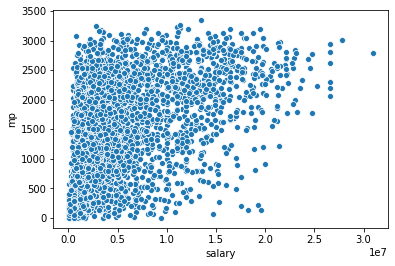

In [152]:
x = statsdf['salary']
y = statsdf['mp']
sns.scatterplot(x,y)

Most outliers have been eliminated using win shares. Minutes played doesn't yield any further obvious outliers.

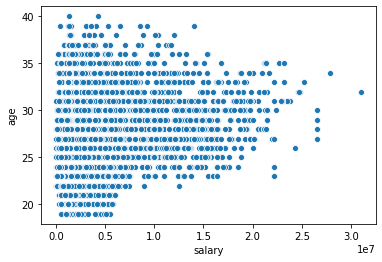

In [153]:
x = statsdf['salary']
y = statsdf['age']
sns.scatterplot(x,y)

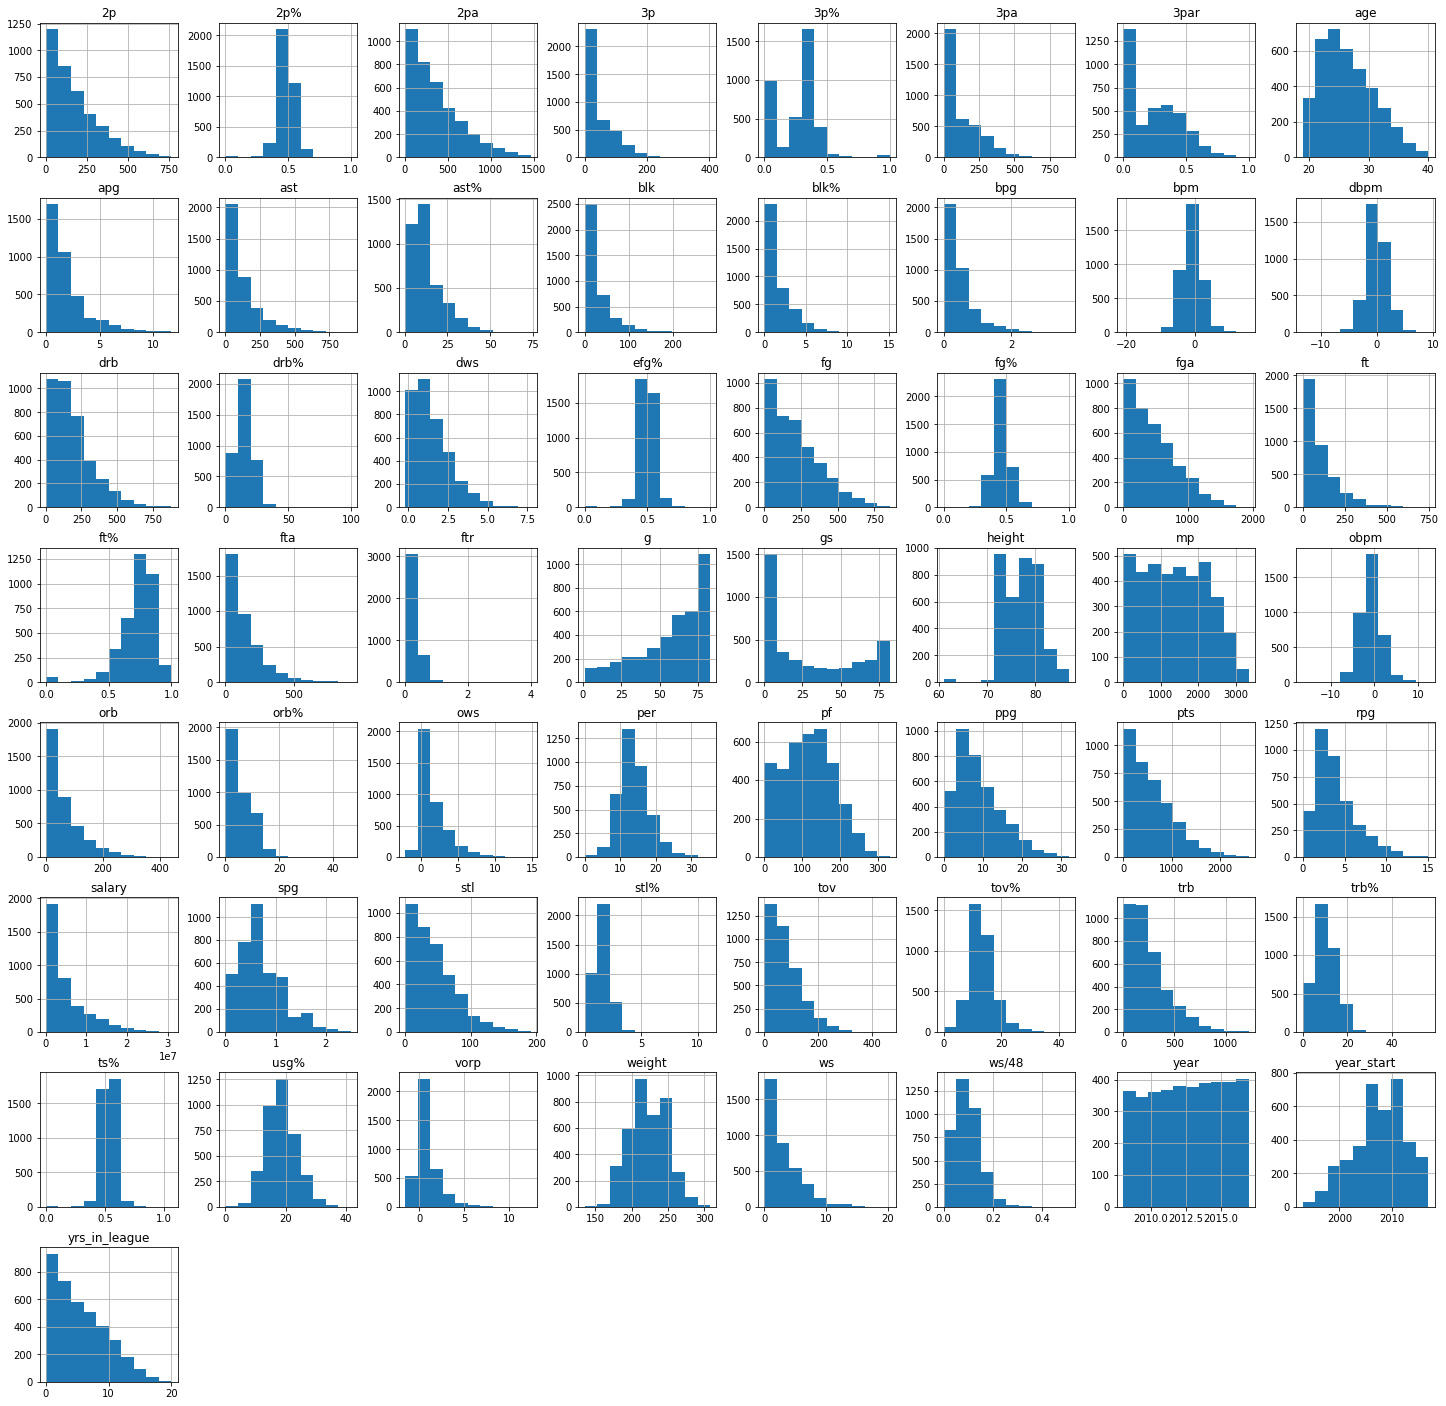

In [154]:
statsdf.hist(figsize=(25,25));

Several productivity stats skew right as the NBA is a star-driven league with few high performers relative to the rest of the players. Games played skews left as the majority of players suit up for all 82 games in a season.

In [155]:
statsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3776 entries, 1 to 4308
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           3776 non-null   int64  
 1   player         3776 non-null   object 
 2   pos            3776 non-null   object 
 3   age            3776 non-null   int64  
 4   tm             3776 non-null   object 
 5   g              3776 non-null   float64
 6   gs             3776 non-null   float64
 7   mp             3776 non-null   float64
 8   per            3776 non-null   float64
 9   ts%            3776 non-null   float64
 10  3par           3776 non-null   float64
 11  ftr            3776 non-null   float64
 12  orb%           3776 non-null   float64
 13  drb%           3776 non-null   float64
 14  trb%           3776 non-null   float64
 15  ast%           3776 non-null   float64
 16  stl%           3776 non-null   float64
 17  blk%           3776 non-null   float64
 18  tov%    

In [156]:
statsdf.corr()['salary'].sort_values(ascending=False).head(20)

salary    1.000000
ppg       0.627104
pts       0.580700
fg        0.578700
ws        0.568754
2p        0.563424
fga       0.561991
2pa       0.556706
fta       0.551961
ft        0.551785
vorp      0.529780
drb       0.522937
tov       0.520924
ows       0.520536
gs        0.519807
dws       0.501928
mp        0.500867
rpg       0.496033
per       0.477805
trb       0.476736
Name: salary, dtype: float64

### Feature Engineering - Polynomial Features

Creating polynomial features with top 3 correlated features.

In [157]:
features = ['ppg', 'pts', 'fg']
X = statsdf[features]

In [158]:
poly = PolynomialFeatures(include_bias = False)

In [159]:
X_poly = poly.fit_transform(X)

In [160]:
X_poly.shape

(3776, 9)

In [161]:
polydf = pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

In [162]:
polydf

,ppg,pts,fg,ppg^2,ppg pts,ppg fg,pts^2,pts fg,fg^2
0,3.7,276.0,99.0,13.69,1021.2,366.3,76176.0,27324.0,9801.0
1,4.9,363.0,131.0,24.01,1778.7,641.9,131769.0,47553.0,17161.0
2,8.8,724.0,272.0,77.44,6371.2,2393.6,524176.0,196928.0,73984.0
3,12.6,867.0,312.0,158.76,10924.2,3931.2,751689.0,270504.0,97344.0
4,15.2,943.0,329.0,231.04,14333.6,5000.8,889249.0,310247.0,108241.0
...,...,...,...,...,...,...,...,...,...
3771,2.9,107.0,39.0,8.41,310.3,113.1,11449.0,4173.0,1521.0
3772,2.8,98.0,33.0,7.84,274.4,92.4,9604.0,3234.0,1089.0
3773,6.2,185.0,73.0,38.44,1147.0,452.6,34225.0,13505.0,5329.0
3774,5.5,240.0,88.0,30.25,1320.0,484.0,57600.0,21120.0,7744.0


In [163]:
polydf.drop(columns = ['ppg', 'pts', 'fg'], inplace = True)

In [164]:
polydf

,ppg^2,ppg pts,ppg fg,pts^2,pts fg,fg^2
0,13.69,1021.2,366.3,76176.0,27324.0,9801.0
1,24.01,1778.7,641.9,131769.0,47553.0,17161.0
2,77.44,6371.2,2393.6,524176.0,196928.0,73984.0
3,158.76,10924.2,3931.2,751689.0,270504.0,97344.0
4,231.04,14333.6,5000.8,889249.0,310247.0,108241.0
...,...,...,...,...,...,...
3771,8.41,310.3,113.1,11449.0,4173.0,1521.0
3772,7.84,274.4,92.4,9604.0,3234.0,1089.0
3773,38.44,1147.0,452.6,34225.0,13505.0,5329.0
3774,30.25,1320.0,484.0,57600.0,21120.0,7744.0


In [165]:
statsdf.reset_index(drop = True, inplace = True)

In [166]:
statsdf = pd.concat([statsdf, polydf], axis = 1)

In [167]:
statsdf

,year,player,pos,age,tm,g,gs,mp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary,year_start,height,weight,college,rpg,apg,ppg,spg,bpg,yrs_in_league,ppg^2,ppg pts,ppg fg,pts^2,pts fg,fg^2
0,2008,Arron Afflalo,SG,22,DET,75.0,9.0,970.0,10.2,0.494,0.199,0.361,4.4,12.5,8.4,8.1,1.8,0.7,10.9,15.2,0.5,1.4,1.9,0.092,-2.3,0.6,-1.6,0.1,99.0,241.0,0.411,10.0,48.0,0.208,89.0,193.0,0.461,0.432,68.0,87.0,0.782,36.0,101.0,137.0,52.0,31.0,8.0,34.0,83.0,276.0,944520,2008,77,210.0,"University of California, Los Angeles",1.8,0.7,3.7,0.4,0.1,0,13.69,1021.2,366.3,76176.0,27324.0,9801.0
1,2009,Arron Afflalo,SG,23,DET,74.0,8.0,1234.0,8.9,0.548,0.357,0.237,2.8,10.1,6.4,5.5,1.3,0.8,11.5,14.5,0.8,1.0,1.8,0.069,-1.7,-0.7,-2.4,-0.1,131.0,300.0,0.437,43.0,107.0,0.402,88.0,193.0,0.456,0.508,58.0,71.0,0.817,30.0,104.0,134.0,44.0,28.0,13.0,43.0,144.0,363.0,1015440,2008,77,210.0,"University of California, Los Angeles",1.8,0.6,4.9,0.4,0.2,1,24.01,1778.7,641.9,131769.0,47553.0,17161.0
2,2010,Arron Afflalo,SG,24,DEN,82.0,75.0,2221.0,10.9,0.576,0.426,0.168,3.1,9.9,6.5,9.3,1.0,1.0,10.5,14.0,2.8,1.4,4.3,0.092,0.8,-0.5,0.3,1.3,272.0,585.0,0.465,108.0,249.0,0.434,164.0,336.0,0.488,0.557,72.0,98.0,0.735,59.0,193.0,252.0,138.0,46.0,30.0,74.0,225.0,724.0,1086240,2008,77,210.0,"University of California, Los Angeles",3.1,1.7,8.8,0.6,0.4,2,77.44,6371.2,2393.6,524176.0,196928.0,73984.0
3,2011,Arron Afflalo,SG,25,DEN,69.0,69.0,2324.0,13.6,0.620,0.396,0.260,2.3,9.9,6.2,10.9,0.7,1.0,9.2,14.8,4.8,1.4,6.2,0.128,2.4,-0.2,2.1,2.4,312.0,627.0,0.498,105.0,248.0,0.423,207.0,379.0,0.546,0.581,138.0,163.0,0.847,45.0,206.0,251.0,168.0,34.0,31.0,71.0,153.0,867.0,1959577,2008,77,210.0,"University of California, Los Angeles",3.6,2.4,12.6,0.5,0.4,3,158.76,10924.2,3931.2,751689.0,270504.0,97344.0
4,2012,Arron Afflalo,SG,26,DEN,62.0,62.0,2086.0,14.7,0.584,0.316,0.353,2.3,8.5,5.5,11.1,0.9,0.5,9.5,19.1,4.7,0.6,5.3,0.121,2.5,-1.6,0.8,1.5,329.0,699.0,0.471,88.0,221.0,0.398,241.0,478.0,0.504,0.534,197.0,247.0,0.798,40.0,157.0,197.0,149.0,36.0,13.0,85.0,134.0,943.0,7562500,2008,77,210.0,"University of California, Los Angeles",3.2,2.4,15.2,0.6,0.2,4,231.04,14333.6,5000.8,889249.0,310247.0,108241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,2017,Fred VanVleet,PG,22,TOR,37.0,0.0,294.0,10.5,0.443,0.261,0.198,1.5,14.6,8.1,17.5,2.9,0.6,11.1,20.6,-0.1,0.4,0.3,0.041,-3.1,-0.1,-3.2,-0.1,39.0,111.0,0.351,11.0,29.0,0.379,28.0,82.0,0.341,0.401,18.0,22.0,0.818,4.0,38.0,42.0,35.0,17.0,2.0,15.0,36.0,107.0,543471,2017,72,195.0,Wichita State University,1.1,0.9,2.9,0.5,0.1,0,8.41,310.3,113.1,11449.0,4173.0,1521.0
3772,2017,Okaro White,PF,24,MIA,35.0,0.0,471.0,7.5,0.507,0.391,0.253,5.8,13.5,9.6,6.0,1.1,1.7,15.7,10.8,0.1,0.5,0.6,0.066,-3.1,0.9,-2.1,0.0,33.0,87.0,0.379,12.0,34.0,0.353,21.0,53.0,0.396,0.448,20.0,22.0,0.909,25.0,57.0,82.0,21.0,10.0,10.0,18.0,52.0,98.0,310995,2017,80,204.0,Florida State University,2.3,0.6,2.8,0.3,0.3,0,7.84,274.4,92.4,9604.0,3234.0,1089.0
3773,2017,Troy Williams,SF,22,TOT,30.0,16.0,557.0,8.9,0.511,0.371,0.192,3.0,11.2,7.0,7.0,2.5,1.7,15.4,17.2,-0.4,0.7,0.3,0.030,-3.4,0.7,-2.7,-0.1,73.0,167.0,0.437,18.0,62.0,0.290,55.0,105.0,0.524,0.491,21.0,32.0,0.656,15.0,54.0,69.0,25.0,27.0,10.0,33.0,60.0,185.0,652165,2017,79,218.0,Indiana University,2.3,0.8,6.2,0.9,0.3,0,38.44,1147.0,452.6,34225.0,13505.0,5329.0
3774,2017,Paul Zipser,SF,22,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,750000,2017,80,215.0,No College,2.8,0.8,5.5,0.3,0.4,0,30.25,1320.0,484.

### Export Merged File

In [168]:
#export the completed table with outliers removed and additional features added
statsdf.to_csv('./Data/stats_cleaned.csv', sep = ',', index=False)